<a href="https://colab.research.google.com/github/gimmas/mini-project-teks/blob/main/preprocess_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
import re
import nltk
from nltk.corpus import stopwords

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

In [167]:
# Install Sastrawi
!pip install Sastrawi

In [168]:
# Import necessary libraries
from googleapiclient.discovery import build
import pandas as pd

In [169]:
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Tugas/TEKS/CSV/youtube_comments.csv'

# Read the CSV file into a pandas DataFrame
try:
    saved_comments_df = pd.read_csv(file_path)
    print(f"Successfully read data from {file_path}")
    display(saved_comments_df)

except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Successfully read data from /content/drive/MyDrive/Tugas/TEKS/CSV/youtube_comments.csv


,author,published_at,text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...
...,...,...,...
2162,@Riswanz-l2g,2025-09-26T09:49:59Z,Pertama bang
2163,@Fatqul,2025-09-26T09:49:52Z,Pertama
2164,@AvinZidan,2025-09-26T09:49:49Z,Pertama
2165,@nezzralmuhammadyusuf4757,2025-09-26T09:49:42Z,First


#lihat data raw

In [170]:
import re
# Import Sastrawi stopword remover
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stop word remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Function to remove stop words from a string using Sastrawi
def remove_stopwords_sastrawi(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    return stopword_remover.remove(text)


# Apply the stop word removal function to the original 'text' column
saved_comments_df['unchanged_wordcloud'] = saved_comments_df['text'].apply(remove_stopwords_sastrawi)

print("Stop words removed from the original text using Sastrawi and stored in 'unchanged_wordcloud' column.")
display(saved_comments_df.head())

Stop words removed from the original text using Sastrawi and stored in 'unchanged_wordcloud' column.


,author,published_at,text,unchanged_wordcloud
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...


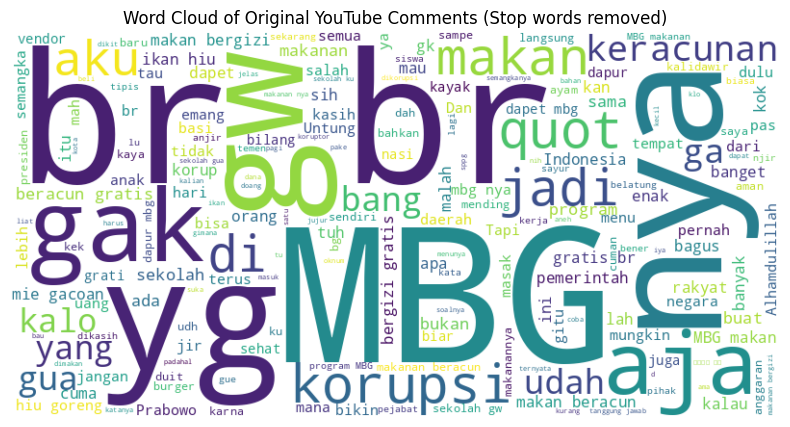

In [171]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the strings in the 'unchanged_wordcloud' column into a single string
wordcloud_text = ' '.join(saved_comments_df['unchanged_wordcloud'].astype(str))

# Create and generate a wordcloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(wordcloud_text)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Original YouTube Comments (Stop words removed)')
plt.show()

In [172]:
from collections import Counter

# Combine all the strings in the 'unchanged_wordcloud' column into a single string
wordcloud_text_unchanged = ' '.join(saved_comments_df['unchanged_wordcloud'].astype(str))

# Tokenize the combined string (simple split by space)
tokens_unchanged = wordcloud_text_unchanged.split()

# Count the frequency of each token
word_counts_unchanged = Counter(tokens_unchanged)

# Get the most common words (e.g., top 20)
most_common_words_unchanged = word_counts_unchanged.most_common(20)

print("Most common words from the 'unchanged_wordcloud' column:")
for word, count in most_common_words_unchanged:
    print(f"{word}: {count}")

Most common words from the 'unchanged_wordcloud' column:
nya: 373
yg: 312
MBG: 270
makan: 251
mbg: 247
gw: 239
sekolah: 202
aja: 179
gak: 176
gratis: 174
makanan: 148
keracunan: 133
gua: 130
aku: 118
korupsi: 118
beracun: 117
program: 115
jadi: 115
sama: 112
bergizi: 107


/tmp/ipython-input-37825514.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_unchanged), y=list(words_unchanged), palette='viridis')


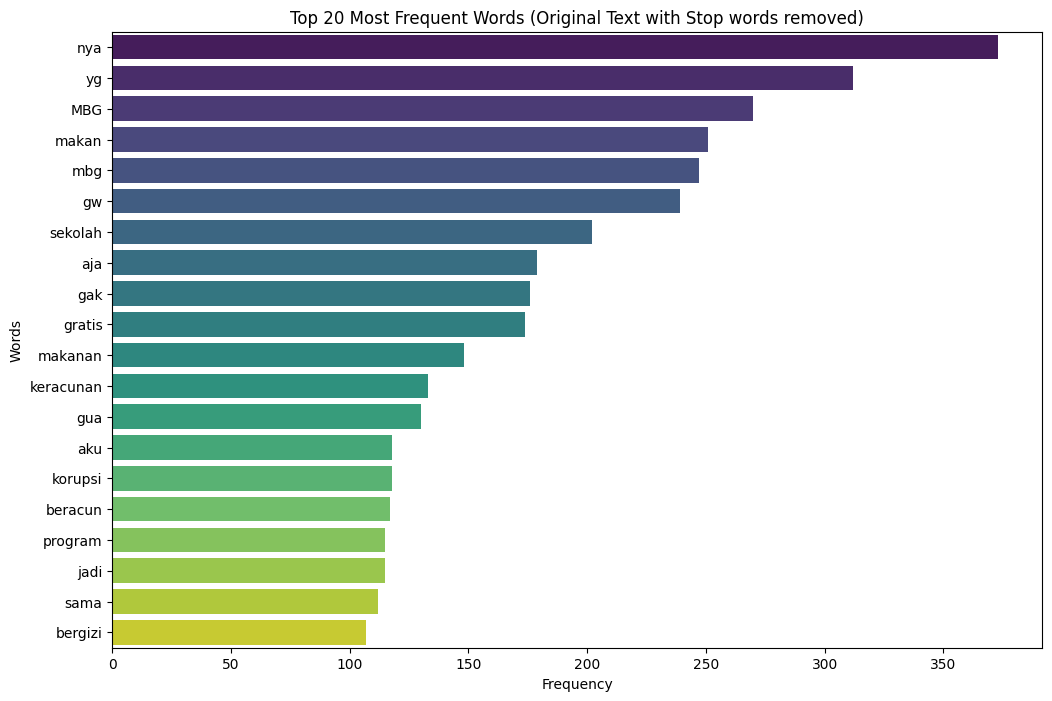

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure most_common_words_unchanged is available from the previous cell
if 'most_common_words_unchanged' in locals():
    # Prepare data for visualization
    words_unchanged, counts_unchanged = zip(*most_common_words_unchanged)

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts_unchanged), y=list(words_unchanged), palette='viridis')
    plt.title('Top 20 Most Frequent Words (Original Text with Stop words removed)')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()
else:
    print("Error: 'most_common_words_unchanged' not found. Please run the previous cell to identify the most common words first.")

# **preprocess**


##cleaning
cleaning duplicate, url, html, mention/hashtag, emoji, numbers

In [174]:
# Remove duplicate rows
initial_rows = len(saved_comments_df)
saved_comments_df.drop_duplicates(inplace=True)
rows_after_dropping = len(saved_comments_df)

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")

if initial_rows > rows_after_dropping:
    print(f"Removed {initial_rows - rows_after_dropping} duplicate rows.")
else:
    print("No duplicate rows found.")

display(saved_comments_df.head())

Initial number of rows: 2167
Number of rows after dropping duplicates: 2167
No duplicate rows found.


,author,published_at,text,unchanged_wordcloud
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...


In [175]:
import re

# Function to remove URLs
def remove_urls(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Function to remove HTML tags and web elements
def remove_html_tags(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    html_pattern = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return html_pattern.sub(r'', text)

# Function to remove mentions and hashtags
def remove_mentions_hashtags(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    pattern = re.compile(r'@\w+|\#\w+')
    return pattern.sub(r'', text)

# Function to remove emojis (more comprehensive)
def remove_emojis(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols and Pictographs
        "\U0001F680-\U0001F6FF"  # Transport and Map Symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002500-\U00002B50"  # Box Drawing and Miscellaneous Symbols
        "\U00002700-\U000027BF"  # Dingbats
        "\U0000FE00-\U0000FE0F"  # Variation Selectors
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U0000200D" # Zero Width Joiner
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Function to remove numbers
def remove_numbers(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    return re.sub(r'\d+', '', text)


# Apply the functions to the 'text' column in order
saved_comments_df['clean_text'] = saved_comments_df['text'].apply(remove_urls)
saved_comments_df['clean_text'] = saved_comments_df['clean_text'].apply(remove_html_tags)
saved_comments_df['clean_text'] = saved_comments_df['clean_text'].apply(remove_mentions_hashtags)
saved_comments_df['clean_text'] = saved_comments_df['clean_text'].apply(remove_emojis)
saved_comments_df['clean_text'] = saved_comments_df['clean_text'].apply(remove_numbers)


print("Preprocessing steps applied: Removing URLs, HTML tags, mentions, hashtags, emojis, and numbers.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Removing URLs, HTML tags, mentions, hashtags, emojis, and numbers.


,author,published_at,text,unchanged_wordcloud,clean_text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...
...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b..."


In [176]:
# 1. Case Folding (already done in cell 6_wq8Wqc1q4A, but including for completeness)
saved_comments_df['case_fold_text'] = saved_comments_df['clean_text'].str.lower()
print("Preprocessing steps applied: Case Folding.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...
...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun,b for beracun
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b..."


In [177]:
# 2. Removing Punctuation
def remove_punctuation(text):
    # Ensure text is a string before applying lower()
    if not isinstance(text, str):
        return text
    return re.sub(r'[^\w\s]', '', text.lower()) # Apply lower() here for consistency

saved_comments_df['punctuation_text'] = saved_comments_df['case_fold_text'].apply(remove_punctuation)
print("Preprocessing steps applied: Case Folding, Removing Punctuation.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text,punctuation_text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...
...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun,b for beracun,b for beracun
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua orang baik...


In [178]:
# Define the file paths for the dictionaries
slang_file_path = '/content/drive/MyDrive/Tugas/TEKS/kamus/slang.csv'
non_standard_file_path = '/content/drive/MyDrive/Tugas/TEKS/kamus/kamuskatabaku.xlsx'

# Read the slang CSV file into a pandas DataFrame
try:
    slang_df = pd.read_csv(slang_file_path)
    print(f"Successfully read data from {slang_file_path}")
    display(slang_df.head())
except FileNotFoundError:
    print(f"Error: The file {slang_file_path} was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

# Read the non-standard word Excel file into a pandas DataFrame
try:
    non_standard_df = pd.read_excel(non_standard_file_path)
    print(f"\nSuccessfully read data from {non_standard_file_path}")
    display(non_standard_df.head())
except FileNotFoundError:
    print(f"Error: The file {non_standard_file_path} was not found.")
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

Successfully read data from /content/drive/MyDrive/Tugas/TEKS/kamus/slang.csv


,slang,formal
0,udah,sudah
1,gua,aku
2,ntar,nanti
3,be like,seperti
4,aja,saja



Successfully read data from /content/drive/MyDrive/Tugas/TEKS/kamus/kamuskatabaku.xlsx


,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [179]:
# Create dictionaries for mapping slang and non-standard words
slang_dict = dict(zip(slang_df['slang'], slang_df['formal']))
non_standard_dict = dict(zip(non_standard_df['tidak_baku'], non_standard_df['kata_baku']))

# Function to replace words using the dictionaries
def replace_words(text):
    if not isinstance(text, str):
        return text
    words = text.split()
    replaced_words = [slang_dict.get(word, non_standard_dict.get(word, word)) for word in words]
    return ' '.join(replaced_words)

# Apply the replacement function to the 'punctuation_text' column
saved_comments_df['normalized_text'] = saved_comments_df['punctuation_text'].apply(replace_words)

print("Preprocessing steps applied: Case Folding, Removing Punctuation, and Standardizing words.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation, and Standardizing words.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text,punctuation_text,normalized_text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...
...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua orang baik...,sudah teman nikmati saja kalau semua orang bai...


In [180]:
import re

# Function to remove extra whitespaces
def remove_extra_whitespace(text):
    if not isinstance(text, str):
        return text
    return re.sub(r'\s+', ' ', text).strip()

# Apply the function to the 'normalized_text' column
saved_comments_df['cleaned_ws'] = saved_comments_df['normalized_text'].apply(remove_extra_whitespace)

print("Extra whitespaces removed from 'normalized_text' and stored in 'normalized_text_cleaned_ws' column.")
display(saved_comments_df.head())

Extra whitespaces removed from 'normalized_text' and stored in 'normalized_text_cleaned_ws' column.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text,punctuation_text,normalized_text,cleaned_ws
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,menyesal pilih prabowo enak aniess pendidikan ...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,anjing semangka setipis tisu
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,di daerah kalimantan selatan tabalong ayam gor...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,kakak kalau makanan mbg itu ada racunnya atau ...


In [181]:
# Import the StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk # Import nltk for tokenization

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

# Apply tokenization and then stemming to the 'normalized_text' column
saved_comments_df['tokens'] = saved_comments_df['cleaned_ws'].apply(nltk.word_tokenize)


print("Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, and Stemming.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, and Stemming.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text,punctuation_text,normalized_text,cleaned_ws,tokens
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,menyesal pilih prabowo enak aniess pendidikan ...,"[menyesal, pilih, prabowo, enak, aniess, pendi..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setipis, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makanan, mbg, itu, ada, racunny..."
...,...,...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing,mbg kalau aku pikir makanan beracun gratis anjing,"[mbg, kalau, aku, pikir, makanan, beracun, gra..."
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun,b untuk beracun,"[b, untuk, beracun]"
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi,daripada makan gratis mending uang ya saja bagi,"[daripada, makan, gratis, mending, uang, ya, s..."
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua orang baik...,sudah teman nikmati saja kalau semua orang bai...,sudah teman nikmati saja kalau semua orang bai...,"[sudah, teman, nikmati, saja, kalau, semua, or..."


In [193]:
import nltk
from nltk.corpus import stopwords

# Download Indonesian stop words (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Get the list of Indonesian stop words and add 'ya' explicitly
stop_words = set(stopwords.words('indonesian'))
stop_words.add('ya') # Explicitly add 'ya' to the stop
stop_words.add('sih') # Explicitly add 'iya' to the stop

# Function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    # Ensure tokens is a list
    if not isinstance(tokens, list):
        return []
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply the stop word removal function to the 'text_stemmed' column
saved_comments_df['removed_stopwords'] = saved_comments_df['tokens'].apply(remove_stopwords)

print("Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, Stemming, and Stop word removal.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, Stemming, and Stop word removal.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text,punctuation_text,normalized_text,cleaned_ws,tokens,removed_stopwords,text_stemmed
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,menyesal pilih prabowo enak aniess pendidikan ...,"[menyesal, pilih, prabowo, enak, aniess, pendi...","[menyesal, pilih, prabowo, enak, aniess, pendi...","[sesal, pilih, prabowo, enak, aniess, didik, g..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setipis, tisu]","[anjing, semangka, setipis, tisu]","[anjing, semangka, setip, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay...","[daerah, kalimantan, selatan, tabalong, ayam, ...","[daerah, kalimantan, selatan, tabalong, ayam, ..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makanan, mbg, itu, ada, racunny...","[kakak, makanan, mbg, racunnya, manggil, panit...","[kakak, makan, mbg, racun, manggil, panitia, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing,mbg kalau aku pikir makanan beracun gratis anjing,"[mbg, kalau, aku, pikir, makanan, beracun, gra...","[mbg, pikir, makanan, beracun, gratis, anjing]","[mbg, pikir, makan, racun, gratis, anjing]"
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun,b untuk beracun,"[b, untuk, beracun]","[b, beracun]","[b, racun]"
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi,daripada makan gratis mending uang ya saja bagi,"[daripada, makan, gratis, mending, uang, ya, s...","[makan, gratis, mending, uang]","[makan, gratis, mending, uang]"
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua o

In [183]:
# Import the StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk # Import nltk for tokenization

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function to perform stemming on a list of tokens
def stem_tokens(tokens):
    # Ensure tokens is a list
    if not isinstance(tokens, list):
        return []
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens


# Then, apply stemming to the tokens
saved_comments_df['text_stemmed'] = saved_comments_df['removed_stopwords'].apply(stem_tokens)


In [201]:
print("Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, Stemming, and Stop word removal.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, Stemming, and Stop word removal.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text,punctuation_text,normalized_text,cleaned_ws,tokens,removed_stopwords,text_stemmed
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,menyesal pilih prabowo enak aniess pendidikan ...,"[menyesal, pilih, prabowo, enak, aniess, pendi...","[menyesal, pilih, prabowo, enak, aniess, pendi...","[sesal, pilih, prabowo, enak, aniess, didik, g..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setipis, tisu]","[anjing, semangka, setipis, tisu]","[anjing, semangka, setip, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay...","[daerah, kalimantan, selatan, tabalong, ayam, ...","[daerah, kalimantan, selatan, tabalong, ayam, ..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makanan, mbg, itu, ada, racunny...","[kakak, makanan, mbg, racunnya, manggil, panit...","[kakak, makan, mbg, racun, manggil, panitia, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing,mbg kalau aku pikir makanan beracun gratis anjing,"[mbg, kalau, aku, pikir, makanan, beracun, gra...","[mbg, pikir, makanan, beracun, gratis, anjing]","[mbg, pikir, makan, racun, gratis, anjing]"
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun,b untuk beracun,"[b, untuk, beracun]","[b, beracun]","[b, racun]"
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi,daripada makan gratis mending uang ya saja bagi,"[daripada, makan, gratis, mending, uang, ya, s...","[makan, gratis, mending, uang]","[makan, gratis, mending, uang]"
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua o

In [202]:
# Manually correct specific stemming errors in the 'text_stemmed' column
def correct_stemming(tokens):
    if not isinstance(tokens, list):
        return tokens
    corrected_tokens = ['tipis' if token == 'setip' else token for token in tokens]
    return corrected_tokens

# Apply the correction function to the 'text_stemmed' column
saved_comments_df['text_stemmed'] = saved_comments_df['text_stemmed'].apply(correct_stemming)

print("Corrected 'setip' to 'tipis' in the 'text_stemmed' column.")
display(saved_comments_df.head(100))

Corrected 'setip' to 'tipis' in the 'text_stemmed' column.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text,punctuation_text,normalized_text,cleaned_ws,tokens,removed_stopwords,text_stemmed
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,menyesal pilih prabowo enak aniess pendidikan ...,"[menyesal, pilih, prabowo, enak, aniess, pendi...","[menyesal, pilih, prabowo, enak, aniess, pendi...","[sesal, pilih, prabowo, enak, aniess, didik, g..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setipis, tisu]","[anjing, semangka, setipis, tisu]","[anjing, semangka, tipis, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay...","[daerah, kalimantan, selatan, tabalong, ayam, ...","[daerah, kalimantan, selatan, tabalong, ayam, ..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makanan, mbg, itu, ada, racunny...","[kakak, makanan, mbg, racunnya, manggil, panit...","[kakak, makan, mbg, racun, manggil, panitia, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing,mbg kalau aku pikir makanan beracun gratis anjing,"[mbg, kalau, aku, pikir, makanan, beracun, gra...","[mbg, pikir, makanan, beracun, gratis, anjing]","[mbg, pikir, makan, racun, gratis, anjing]"
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun,b untuk beracun,"[b, untuk, beracun]","[b, beracun]","[b, racun]"
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi,daripada makan gratis mending uang ya saja bagi,"[daripada, makan, gratis, mending, uang, ya, s...","[makan, gratis, mending, uang]","[makan, gratis, mending, uang]"
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua o

In [203]:
print("Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, Stemming, and Stop word removal.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, Stemming, and Stop word removal.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text,punctuation_text,normalized_text,cleaned_ws,tokens,removed_stopwords,text_stemmed
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,menyesal pilih prabowo enak aniess pendidikan ...,"[menyesal, pilih, prabowo, enak, aniess, pendi...","[menyesal, pilih, prabowo, enak, aniess, pendi...","[sesal, pilih, prabowo, enak, aniess, didik, g..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setipis, tisu]","[anjing, semangka, setipis, tisu]","[anjing, semangka, tipis, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay...","[daerah, kalimantan, selatan, tabalong, ayam, ...","[daerah, kalimantan, selatan, tabalong, ayam, ..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makanan, mbg, itu, ada, racunny...","[kakak, makanan, mbg, racunnya, manggil, panit...","[kakak, makan, mbg, racun, manggil, panitia, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing,mbg kalau aku pikir makanan beracun gratis anjing,"[mbg, kalau, aku, pikir, makanan, beracun, gra...","[mbg, pikir, makanan, beracun, gratis, anjing]","[mbg, pikir, makan, racun, gratis, anjing]"
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun,b untuk beracun,"[b, untuk, beracun]","[b, beracun]","[b, racun]"
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi,daripada makan gratis mending uang ya saja bagi,"[daripada, makan, gratis, mending, uang, ya, s...","[makan, gratis, mending, uang]","[makan, gratis, mending, uang]"
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua o

In [214]:
# Remove the token 'ku' from the 'text_stemmed' column
def remove_specific_token(tokens, token_to_remove):
    if not isinstance(tokens, list):
        return tokens
    return [token for token in tokens if token != token_to_remove]

saved_comments_df['text_stemmed'] = saved_comments_df['text_stemmed'].apply(lambda x: remove_specific_token(x, 'ku'))

print("Removed 'ku' from 'text_stemmed' column.")
display(saved_comments_df.head(100))

Removed 'ku' from 'text_stemmed' column.


,author,published_at,text,unchanged_wordcloud,clean_text,case_fold_text,punctuation_text,normalized_text,cleaned_ws,tokens,removed_stopwords,text_stemmed
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,menyesal pilih prabowo enak aniess pendidikan ...,"[menyesal, pilih, prabowo, enak, aniess, pendi...","[menyesal, pilih, prabowo, enak, aniess, pendi...","[sesal, pilih, prabowo, enak, aniess, didik, g..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setipis, tisu]","[anjing, semangka, setipis, tisu]","[anjing, semangka, tipis, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay...","[daerah, kalimantan, selatan, tabalong, ayam, ...","[daerah, kalimantan, selatan, tabalong, ayam, ..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG ada racunnya gmn. Menuru...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makanan, mbg, itu, ada, racunny...","[kakak, makanan, mbg, racunnya, manggil, panit...","[kakak, makan, mbg, racun, manggil, panitia, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing,mbg kalau aku pikir makanan beracun gratis anjing,"[mbg, kalau, aku, pikir, makanan, beracun, gra...","[mbg, pikir, makanan, beracun, gratis, anjing]","[mbg, pikir, makan, racun, gratis, anjing]"
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun,b untuk beracun,"[b, untuk, beracun]","[b, beracun]","[b, racun]"
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi,daripada makan gratis mending uang ya saja bagi,"[daripada, makan, gratis, mending, uang, ya, s...","[makan, gratis, mending, uang]","[makan, gratis, mending, uang]"
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua o

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [215]:
# Define the file path to save the processed data
output_file_path = '/content/drive/MyDrive/Tugas/TEKS/CSV/youtube_comments_processed.csv'

# Save the processed DataFrame to a new CSV file
try:
    saved_comments_df.to_csv(output_file_path, index=False)
    print(f"Successfully saved processed data to {output_file_path}")
except Exception as e:
    print(f"An error occurred while saving the CSV file: {e}")

Successfully saved processed data to /content/drive/MyDrive/Tugas/TEKS/CSV/youtube_comments_processed.csv


**Reasoning**:
Create dictionaries from the loaded dataframes and define functions to replace slang and non-standard words.



# EDA



In [205]:
!pip install wordcloud

In [216]:
from collections import Counter

# Combine all the cleaned tokens into a single list
all_cleaned_tokens = [token for tokens_list in saved_comments_df['text_stemmed'] for token in tokens_list]

# Count the frequency of each token
word_counts_clean = Counter(all_cleaned_tokens)

# Get the most common words (e.g., top 20)
most_common_words_clean = word_counts_clean.most_common(20)

print("Most common words after preprocessing:")
for word, count in most_common_words_clean:
    print(f"{word}: {count}")

Most common words after preprocessing:
mbg: 658
makan: 658
racun: 385
gratis: 297
sekolah: 277
korupsi: 241
gizi: 222
program: 171
orang: 141
semangka: 134
hiu: 133
kakak: 127
enak: 116
anjing: 106
anak: 106
ikan: 106
salah: 105
indonesia: 104
kasih: 104
uang: 98


/tmp/ipython-input-3998225402.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_clean), y=list(words_clean), palette='viridis')


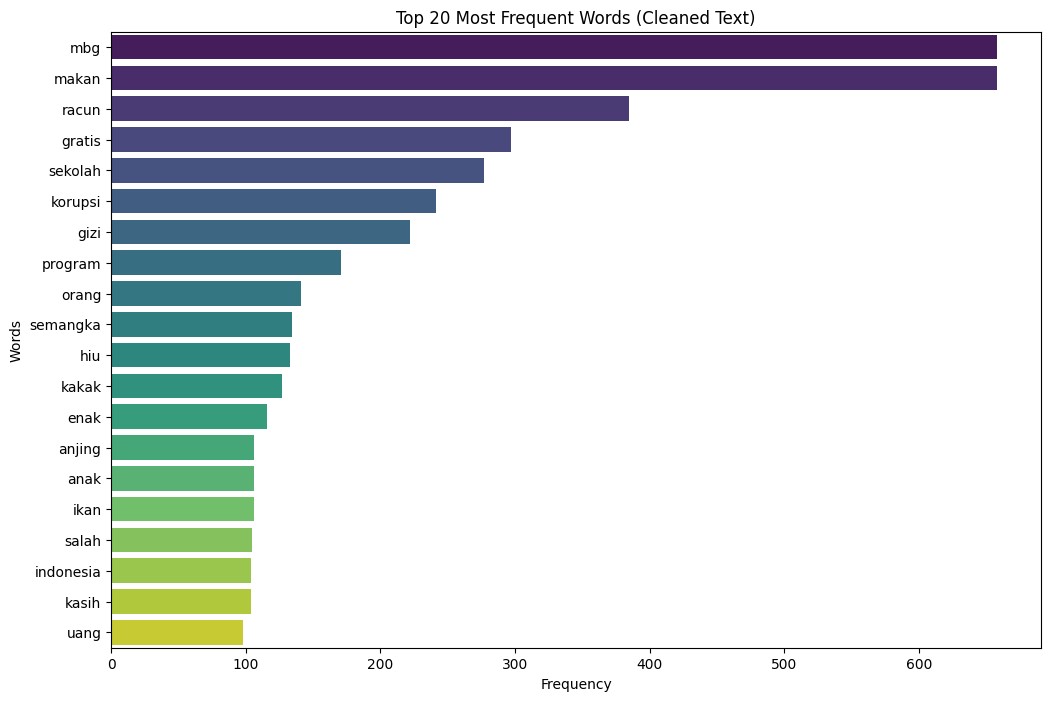

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure most_common_words_clean is available from the previous cell
if 'most_common_words_clean' in locals():
    # Prepare data for visualization
    words_clean, counts_clean = zip(*most_common_words_clean)

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts_clean), y=list(words_clean), palette='viridis')
    plt.title('Top 20 Most Frequent Words (Cleaned Text)')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()
else:
    print("Error: 'most_common_words_clean' not found. Please run the previous cell to identify the most common words first.")

Word cloud from frequent words object created.


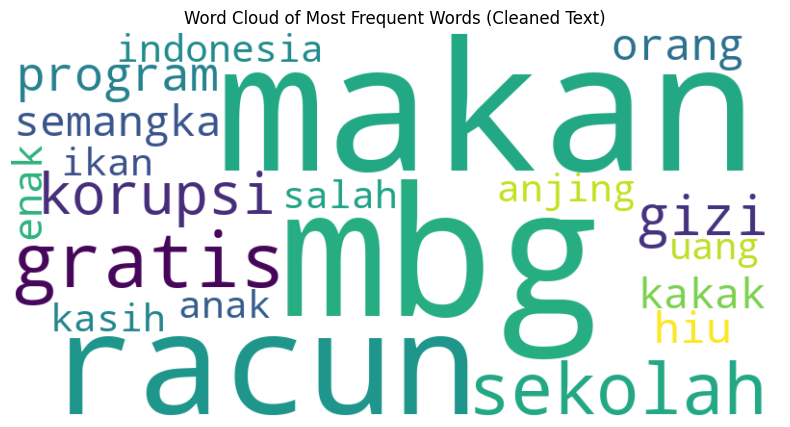

In [225]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure most_common_words_clean is available
if 'most_common_words_clean' in locals():
    # Create a dictionary from the most common words and their counts
    word_freq_dict = dict(most_common_words_clean)

    # Create and generate a wordcloud image from the frequency dictionary
    wordcloud_freq = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq_dict)

    print("Word cloud from frequent words object created.")

    # Display the generated word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_freq, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Most Frequent Words (Cleaned Text)')
    plt.show()
else:
    print("Error: 'most_common_words_clean' not found. Please run the previous cell to identify the most common words first.")

In [220]:
from collections import Counter
import nltk

# Ensure nltk punkt tokenizer is available
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')


# Function to generate n-grams from a list of tokens, filtering empty tokens
def generate_ngrams_filtered(tokens, n):
    if not isinstance(tokens, list):
        return []
    # Filter out empty strings before generating ngrams
    filtered_tokens = [token for token in tokens if token.strip() != '']
    if len(filtered_tokens) < n:
        return []
    return list(nltk.ngrams(filtered_tokens, n))

# Generate and count bigrams from the 'text_stemmed' column using the filtered function
all_bigrams = [ngram for tokens_list in saved_comments_df['text_stemmed']
               for ngram in generate_ngrams_filtered(tokens_list, 2)]

bigram_counts = Counter(all_bigrams)
most_common_bigrams = bigram_counts.most_common(20)

print("Most common Bigrams:")
for bigram, count in most_common_bigrams:
    print(f"{bigram}: {count}")

print("\n" + "="*30 + "\n") # Separator

# Generate and count trigrams from the 'text_stemmed' column using the filtered function
all_trigrams = [ngram for tokens_list in saved_comments_df['text_stemmed']
                for ngram in generate_ngrams_filtered(tokens_list, 3)]

trigram_counts = Counter(all_trigrams)
most_common_trigrams = trigram_counts.most_common(20)

print("Most common Trigrams:")
for trigram, count in most_common_trigrams:
    print(f"{trigram}: {count}")

Most common Bigrams:
('racun', 'gratis'): 116
('makan', 'racun'): 114
('makan', 'gizi'): 90
('mbg', 'makan'): 84
('ikan', 'hiu'): 77
('mie', 'gaco'): 62
('gizi', 'gratis'): 56
('hiu', 'goreng'): 43
('makan', 'mbg'): 42
('semangka', 'tipis'): 36
('sekolah', 'mbg'): 34
('program', 'mbg'): 30
('gaco', 'gizi'): 30
('makan', 'gratis'): 28
('dapur', 'mbg'): 26
('mbg', 'racun'): 23
('orang', 'tua'): 23
('program', 'bagus'): 22
('gratis', 'makan'): 20
('ahli', 'gizi'): 20


Most common Trigrams:
('makan', 'racun', 'gratis'): 86
('makan', 'gizi', 'gratis'): 47
('mbg', 'makan', 'racun'): 36
('mie', 'gaco', 'gizi'): 22
('ikan', 'hiu', 'goreng'): 21
('mbg', 'makan', 'gizi'): 21
('gizi', 'gratis', 'makan'): 16
('gratis', 'makan', 'racun'): 10
('makan', 'ikan', 'hiu'): 9
('ikan', 'hiu', 'enak'): 9
('makan', 'siang', 'gratis'): 9
('gratis', 'mbg', 'makan'): 9
('makan', 'gizi', 'gratismakan'): 8
('untung', 'sekolah', 'mbg'): 8
('makan', 'basi', 'gratis'): 8
('mbgmakan', 'racun', 'gratis'): 8
('gizi', 

/tmp/ipython-input-686031903.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_counts_values, y=bigram_phrases, palette='viridis')


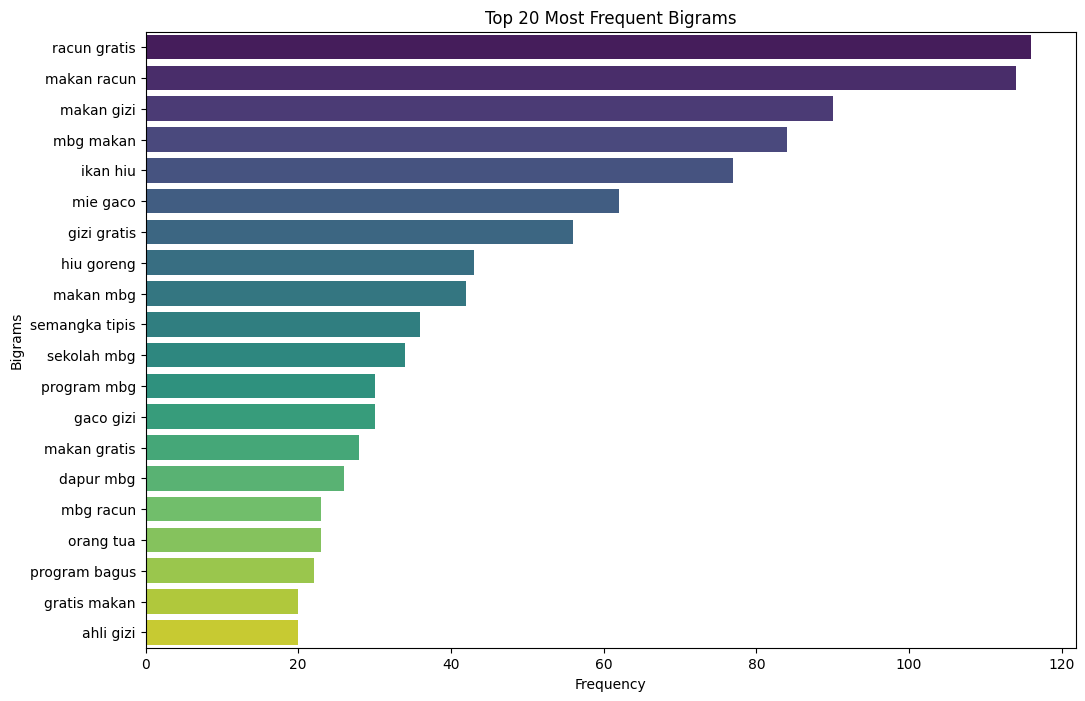

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure most_common_bigrams is available from the previous cell
if 'most_common_bigrams' in locals():
    # Prepare data for visualization
    bigram_phrases = [' '.join(bigram[0]) for bigram in most_common_bigrams]
    bigram_counts_values = [bigram[1] for bigram in most_common_bigrams]

    # Create a bar plot for bigrams
    plt.figure(figsize=(12, 8))
    sns.barplot(x=bigram_counts_values, y=bigram_phrases, palette='viridis')
    plt.title('Top 20 Most Frequent Bigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()
else:
    print("Error: 'most_common_bigrams' not found. Please run the previous cell to generate bigrams first.")

/tmp/ipython-input-4103060806.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trigram_counts_values, y=trigram_phrases, palette='viridis')


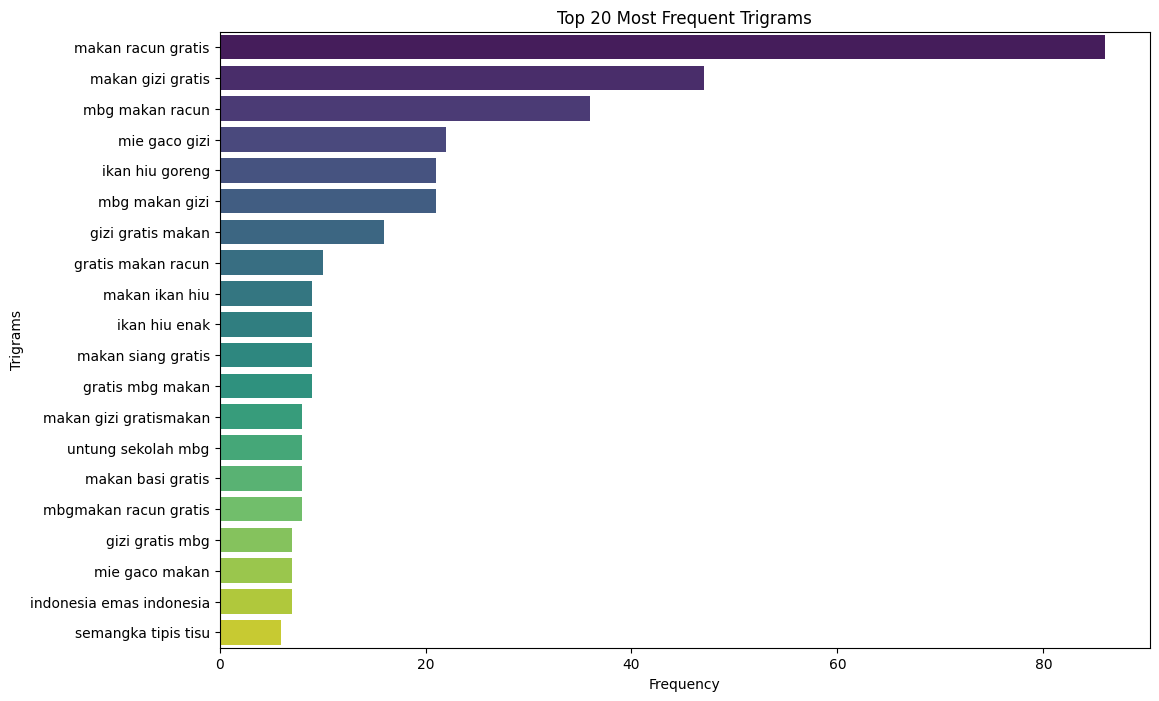

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure most_common_trigrams is available from the previous cell
if 'most_common_trigrams' in locals():
    # Prepare data for visualization
    trigram_phrases = [' '.join(trigram[0]) for trigram in most_common_trigrams]
    trigram_counts_values = [trigram[1] for trigram in most_common_trigrams]

    # Create a bar plot for trigrams
    plt.figure(figsize=(12, 8))
    sns.barplot(x=trigram_counts_values, y=trigram_phrases, palette='viridis')
    plt.title('Top 20 Most Frequent Trigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Trigrams')
    plt.show()
else:
    print("Error: 'most_common_trigrams' not found. Please run the previous cell to generate trigrams first.")

Bigram word cloud object created.


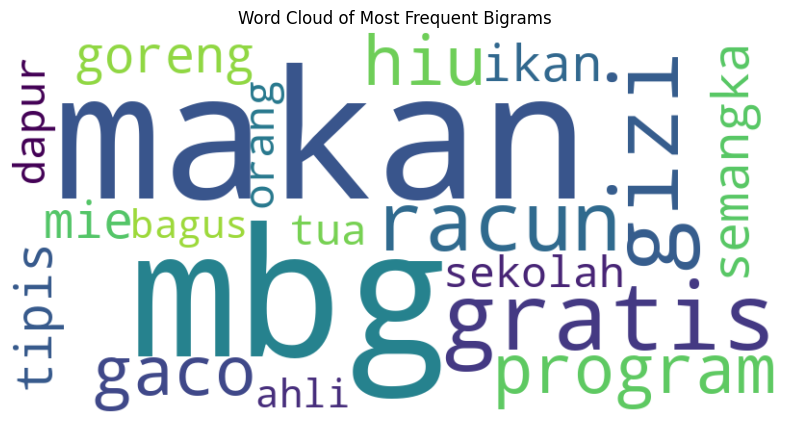

In [223]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure most_common_bigrams is available
if 'most_common_bigrams' in locals():
    # Combine the most common bigrams into a single list of strings
    # Represent each bigram as a single string
    bigram_strings = [' '.join(bigram[0]) for bigram in most_common_bigrams]

    # Combine all the bigram strings into a single string for the word cloud
    bigram_wordcloud_text = ' '.join(bigram_strings)

    # Create and generate a wordcloud image
    # Consider increasing max_words if you want to include more bigrams than the top 20
    wordcloud_bigram = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50).generate(bigram_wordcloud_text)

    print("Bigram word cloud object created.")

    # Display the generated word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_bigram, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Most Frequent Bigrams')
    plt.show()
else:
    print("Error: 'most_common_bigrams' not found. Please run the previous cell to generate bigrams first.")

Trigram word cloud object created.


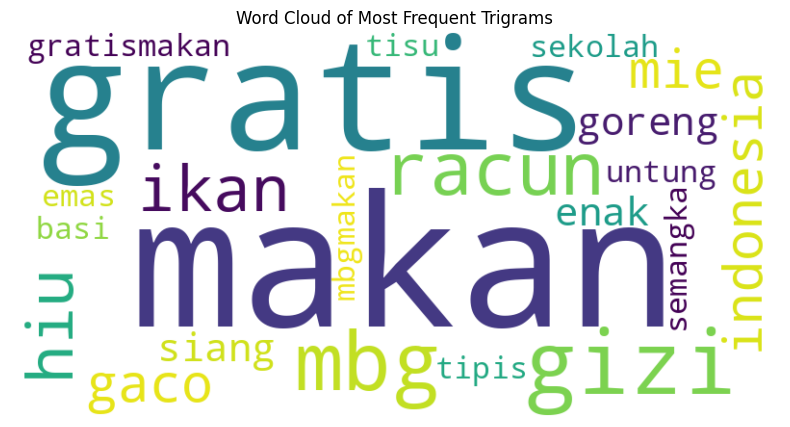

In [224]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure most_common_trigrams is available
if 'most_common_trigrams' in locals():
    # Combine the most common trigrams into a single list of strings
    # Represent each trigram as a single string
    trigram_strings = [' '.join(trigram[0]) for trigram in most_common_trigrams]

    # Combine all the trigram strings into a single string for the word cloud
    trigram_wordcloud_text = ' '.join(trigram_strings)

    # Create and generate a wordcloud image
    # Consider increasing max_words if you want to include more trigrams than the top 20
    wordcloud_trigram = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50).generate(trigram_wordcloud_text)

    print("Trigram word cloud object created.")

    # Display the generated word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_trigram, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Most Frequent Trigrams')
    plt.show()
else:
    print("Error: 'most_common_trigrams' not found. Please run the previous cell to generate trigrams first.")